# **Initial Load**

Authenticate with Google Drive and read in our dataset.

In [1]:
# Install any required packages.
!pip install -U -q PyDrive

In [6]:
# Import any required libraries.
from google.colab import auth
from patsy import dmatrices
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

In [7]:
# Authenticate with Google Drive.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [50]:
# Download our dataset from Google Drive.
downloaded_file = drive.CreateFile({ 'id': '14RMV7CRXwwCt_9iLHenyQrB9GC5gYwul' })
downloaded_file.GetContentFile('ChicagoCrimeRecords.csv')
chicago_crime_records = pd.read_csv('ChicagoCrimeRecords.csv')

### Pre-Processing the data

In [51]:
# Drop any NANs before we begin.
chicago_crime_records.dropna(inplace = True)

In [52]:
# Take a look at all of the columns in our dataset.
chicago_crime_records.columns.sort_values()

Index(['Arrest', 'Beat', 'Block', 'Case Number', 'Community Area', 'Date',
       'Description', 'District', 'Domestic', 'FBI Code', 'ID', 'IUCR',
       'Latitude', 'Location', 'Location Description', 'Longitude',
       'Primary Type', 'Updated On', 'Ward', 'X Coordinate', 'Y Coordinate',
       'Year'],
      dtype='object')

In [53]:
#Copying the og in a smaller one
OG_sample=chicago_crime_records.sample(10000)

In [58]:
#Split data
X_OG=OG_sample.drop(columns='Primary Type')
Y_OG=OG_sample['Primary Type']

In [60]:
"""
bestfeatures = SelectKBest(score_func=chi2,k='all')

fit = bestfeatures.fit(X_OG,Y_OG)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_OG.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(14,'Score'))  #print features sorted by best first"""

"\nbestfeatures = SelectKBest(score_func=chi2,k='all')\n\nfit = bestfeatures.fit(X_OG,Y_OG)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_OG.columns)\n#concat two dataframes for better visualization \nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']  #naming the dataframe columns\nprint(featureScores.nlargest(14,'Score'))  #print features sorted by best first"

In [13]:
# Remove any columns that we are confident will not be of any use to our model.
chicago_crime_records.drop(
    columns = ['Block', 'Case Number', 'Date', 'Description', 'FBI Code', 'ID', 'IUCR', 'Latitude', 'Location', 'Longitude', 'Updated On', 'X Coordinate', 'Y Coordinate', 'Year'],
    axis = 1,
    inplace = True,
    errors = 'ignore')

In [14]:
# Encode the 'Arrest', 'Domestic', 'Location Description' and 'Primary Type' columns.
chicago_crime_records['Arrest'] = chicago_crime_records['Arrest'].astype(int)

chicago_crime_records['Domestic'] = chicago_crime_records['Domestic'].astype(int)

chicago_crime_records['Location Description'] = chicago_crime_records['Location Description'].astype('category')
chicago_crime_records['Location Description'] = chicago_crime_records['Location Description'].cat.codes

In [15]:
# Generate a correlation matrix, based on certain variables in our dataset.
correlation_matrix = chicago_crime_records[[
    'Arrest',
    'Beat',
    'Community Area',
    'District',
    'Domestic',
    'Ward']].corr()

correlation_matrix.style.background_gradient(cmap = 'coolwarm')

,Arrest,Beat,Community Area,District,Domestic,Ward
Arrest,1.000000,-0.016198,-0.001922,-0.017352,-0.066235,-0.016714
Beat,-0.016198,1.000000,-0.500825,0.950927,-0.047260,0.642197
Community Area,-0.001922,-0.500825,1.000000,-0.495310,0.078146,-0.529669
District,-0.017352,0.950927,-0.495310,1.000000,-0.043854,0.685694
Domestic,-0.066235,-0.047260,0.078146,-0.043854,1.000000,-0.055748
Ward,-0.016714,0.642197,-0.529669,0.685694,-0.055748,1.000000


In [17]:
#Splitting the data
X=chicago_crime_records.drop(columns='Primary Type')
Y=chicago_crime_records['Primary Type']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=117)

In [19]:
#training the model 1st try
Knnmodel=KNeighborsClassifier()
Knnmodel.fit(x_train,y_train)
Knnmodel.n_neighbors=5
y_pred=Knnmodel.predict(x_test)
print(Knnmodel.score(x_test,y_test))


0.35991365049368496


In [20]:
df1=chicago_crime_records.drop(columns='District')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


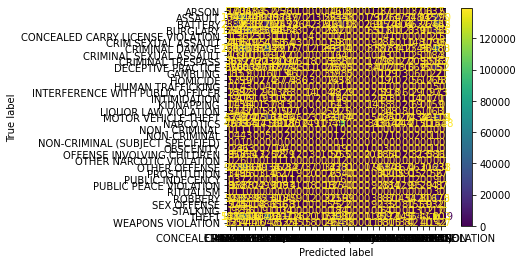

In [23]:
plot_confusion_matrix(Knnmodel, x_test, y_test)  
plt.show()

In [46]:
#shuffling and sampling the data
dfSampled=df1.sample(10000)

In [47]:
#Splitting the sampled data
X_sampled=dfSampled.drop(columns='Primary Type')
Y_sampled=dfSampled['Primary Type']
x_sampled_train,x_sampled_test,y_sampled_train,y_sampled_test=train_test_split(X_sampled,Y_sampled,test_size=0.2,random_state=117)

In [48]:
#training the model 1st try
KnnSampledmodel=KNeighborsClassifier()
KnnSampledmodel.fit(x_sampled_train,y_sampled_train)
y_sampled_pred=KnnSampledmodel.predict(x_sampled_test)
print(KnnSampledmodel.score(x_sampled_test,y_sampled_test))

0.2575


In [34]:
dfSampledOG=chicago_crime_records.sample(10000)

In [38]:
#Splitting the sampled data
X_sampled_OG=dfSampledOG.drop(columns='Primary Type')
Y_sampled_OG=dfSampledOG['Primary Type']
x_OG_sampled_train,x_OG_sampled_test,y_OG_sampled_train,y_OG_sampled_test=train_test_split(X_sampled_OG,Y_sampled_OG,test_size=0.2,random_state=117)

In [39]:
#training the model 1st try
OGKnnSampledmodel=KNeighborsClassifier()
OGKnnSampledmodel.fit(x_OG_sampled_train,y_OG_sampled_train)
y_OG_sampled_pred=OGKnnSampledmodel.predict(x_OG_sampled_test)
print(OGKnnSampledmodel.score(x_OG_sampled_test,y_OG_sampled_test))

0.263
